In [108]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.cluster.vq import whiten, kmeans2


def call_api(uri, result_key):
    json = {}
    json = requests.get(uri, headers = { 'X-Auth-Token': '4c5ff52b04d84b4d9fd592bcc2252f08' }).json()
    return json[result_key]
    print(json)
    

teams = call_api('http://api.football-data.org/v1/soccerseasons/426/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/322/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/322/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/322'}},
  'code': 'HUL',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/a/a9/Hull_City_AFC.svg',
  'name': 'Hull City FC',
  'shortName': 'Hull'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/338/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/338/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/338'}},
  'code': 'LCFC',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/en/6/63/Leicester02.png',
  'name': 'Leicester City FC',
  'shortName': 'Foxes'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/340/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/340/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/340'}},


In [109]:
call_api('http://api.football-data.org/v1/teams/66/fixtures', 'fixtures')

[{'_links': {'awayTeam': {'href': 'http://api.football-data.org/v1/teams/66'},
   'competition': {'href': 'http://api.football-data.org/v1/competitions/426'},
   'homeTeam': {'href': 'http://api.football-data.org/v1/teams/1044'},
   'self': {'href': 'http://api.football-data.org/v1/fixtures/150835'}},
  'awayTeamName': 'Manchester United FC',
  'date': '2016-08-14T12:30:00Z',
  'homeTeamName': 'AFC Bournemouth',
  'matchday': 1,
  'odds': {'awayWin': 1.72, 'draw': 3.3, 'homeWin': 5.5},
  'result': {'goalsAwayTeam': 3, 'goalsHomeTeam': 1},
  'status': 'FINISHED'},
 {'_links': {'awayTeam': {'href': 'http://api.football-data.org/v1/teams/340'},
   'competition': {'href': 'http://api.football-data.org/v1/competitions/426'},
   'homeTeam': {'href': 'http://api.football-data.org/v1/teams/66'},
   'self': {'href': 'http://api.football-data.org/v1/fixtures/150827'}},
  'awayTeamName': 'Southampton FC',
  'date': '2016-08-19T19:00:00Z',
  'homeTeamName': 'Manchester United FC',
  'matchday': 2,

In [110]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')

    defeat = 0
    for f in fixtures:
        if f['result']['goalsHomeTeam'] == None:
            result_goalsHomeTeam = 0  
        else:
            result_goalsHomeTeam = f['result']['goalsHomeTeam']
        if f['result']['goalsAwayTeam'] == None:
            result_goalsAwayTeam = 0  
        else: 
            result_goalsAwayTeam = f['result']['goalsAwayTeam']
        if team['name'] == f['homeTeamName']:          
            defeat += 1 if result_goalsHomeTeam < result_goalsAwayTeam else 0
        elif team['name'] == f['awayTeamName']:
            defeat += 1 if result_goalsAwayTeam < result_goalsHomeTeam else 0       
    
    print('Команда "{}", {} поражений, стоимоть команды.'.format(team['name'], defeat))
    team['defeat'] = defeat

Команда "Hull City FC", 20 поражений, стоимоть команды.
Команда "Leicester City FC", 20 поражений, стоимоть команды.
Команда "Southampton FC", 15 поражений, стоимоть команды.
Команда "Watford FC", 16 поражений, стоимоть команды.
Команда "Middlesbrough FC", 18 поражений, стоимоть команды.
Команда "Stoke City FC", 16 поражений, стоимоть команды.
Команда "Everton FC", 9 поражений, стоимоть команды.
Команда "Tottenham Hotspur FC", 7 поражений, стоимоть команды.
Команда "Crystal Palace FC", 19 поражений, стоимоть команды.
Команда "West Bromwich Albion FC", 14 поражений, стоимоть команды.
Команда "Burnley FC", 19 поражений, стоимоть команды.
Команда "Swansea City FC", 22 поражений, стоимоть команды.
Команда "Manchester City FC", 8 поражений, стоимоть команды.
Команда "Sunderland AFC", 23 поражений, стоимоть команды.
Команда "AFC Bournemouth", 17 поражений, стоимоть команды.
Команда "Manchester United FC", 4 поражений, стоимоть команды.
Команда "Arsenal FC", 10 поражений, стоимоть команды.
Ко

In [111]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    goals = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        else:
            goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
    print('Команда "{}", {} поражений, {} голов.'.format(team['name'], defeat, goals))
    team['goals'] = goals

Команда "Hull City FC", 17 поражений, 39 голов.
Команда "Leicester City FC", 17 поражений, 57 голов.
Команда "Southampton FC", 17 поражений, 42 голов.
Команда "Watford FC", 17 поражений, 39 голов.
Команда "Middlesbrough FC", 17 поражений, 31 голов.
Команда "Stoke City FC", 17 поражений, 37 голов.
Команда "Everton FC", 17 поражений, 61 голов.
Команда "Tottenham Hotspur FC", 17 поражений, 92 голов.
Команда "Crystal Palace FC", 17 поражений, 48 голов.
Команда "West Bromwich Albion FC", 17 поражений, 40 голов.
Команда "Burnley FC", 17 поражений, 37 голов.
Команда "Swansea City FC", 17 поражений, 39 голов.
Команда "Manchester City FC", 17 поражений, 102 голов.
Команда "Sunderland AFC", 17 поражений, 26 голов.
Команда "AFC Bournemouth", 17 поражений, 49 голов.
Команда "Manchester United FC", 17 поражений, 60 голов.
Команда "Arsenal FC", 17 поражений, 98 голов.
Команда "Liverpool FC", 17 поражений, 72 голов.
Команда "Chelsea FC", 17 поражений, 84 голов.
Команда "West Ham United FC", 17 пораже

In [112]:
team_for_pd = []
for team in teams:
    if team['defeat']:
        team_for_pd.append({'name': team['name'], 'defeat': team['defeat'], 'goals': team['goals']})
team_for_pd

[{'defeat': 20, 'goals': 39, 'name': 'Hull City FC'},
 {'defeat': 20, 'goals': 57, 'name': 'Leicester City FC'},
 {'defeat': 15, 'goals': 42, 'name': 'Southampton FC'},
 {'defeat': 16, 'goals': 39, 'name': 'Watford FC'},
 {'defeat': 18, 'goals': 31, 'name': 'Middlesbrough FC'},
 {'defeat': 16, 'goals': 37, 'name': 'Stoke City FC'},
 {'defeat': 9, 'goals': 61, 'name': 'Everton FC'},
 {'defeat': 7, 'goals': 92, 'name': 'Tottenham Hotspur FC'},
 {'defeat': 19, 'goals': 48, 'name': 'Crystal Palace FC'},
 {'defeat': 14, 'goals': 40, 'name': 'West Bromwich Albion FC'},
 {'defeat': 19, 'goals': 37, 'name': 'Burnley FC'},
 {'defeat': 22, 'goals': 39, 'name': 'Swansea City FC'},
 {'defeat': 8, 'goals': 102, 'name': 'Manchester City FC'},
 {'defeat': 23, 'goals': 26, 'name': 'Sunderland AFC'},
 {'defeat': 17, 'goals': 49, 'name': 'AFC Bournemouth'},
 {'defeat': 4, 'goals': 60, 'name': 'Manchester United FC'},
 {'defeat': 10, 'goals': 98, 'name': 'Arsenal FC'},
 {'defeat': 7, 'goals': 72, 'name':

In [113]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,defeat,goals,name
0,20,39,Hull City FC
1,20,57,Leicester City FC
2,15,42,Southampton FC
3,16,39,Watford FC
4,18,31,Middlesbrough FC
5,16,37,Stoke City FC
6,9,61,Everton FC
7,7,92,Tottenham Hotspur FC
8,19,48,Crystal Palace FC
9,14,40,West Bromwich Albion FC


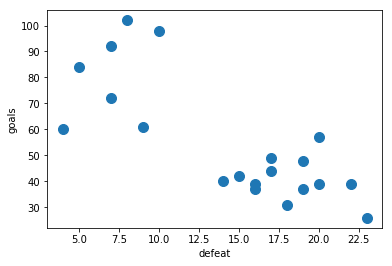

In [114]:
teams_pd.plot.scatter(x='defeat', y='goals', s=100)

In [115]:
del teams_pd['name']
teams_pd

,defeat,goals
0,20,39
1,20,57
2,15,42
3,16,39
4,18,31
5,16,37
6,9,61
7,7,92
8,19,48
9,14,40


In [116]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 3.47052804,  1.73939527],
       [ 3.47052804,  2.54219309],
       [ 2.60289603,  1.87319491],
       [ 2.77642243,  1.73939527],
       [ 3.12347524,  1.38259624],
       [ 2.77642243,  1.65019552],
       [ 1.56173762,  2.72059261],
       [ 1.21468481,  4.10318885],
       [ 3.29700164,  2.14079418],
       [ 2.42936963,  1.78399515],
       [ 3.29700164,  1.65019552],
       [ 3.81758085,  1.73939527],
       [ 1.38821122,  4.54918764],
       [ 3.99110725,  1.15959685],
       [ 2.94994884,  2.18539406],
       [ 0.69410561,  2.67599273],
       [ 1.73526402,  4.37078812],
       [ 1.21468481,  3.21119128],
       [ 0.86763201,  3.74638982],
       [ 2.94994884,  1.96239467]])

In [117]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 3.90434405,  1.44949606],
        [ 1.2394743 ,  3.62533301],
        [ 3.01304935,  1.87724945]]),
 array([2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2]))

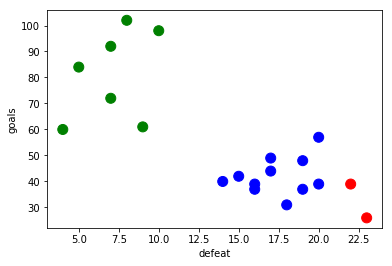

In [118]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='defeat', y='goals', c=colors, s=100)

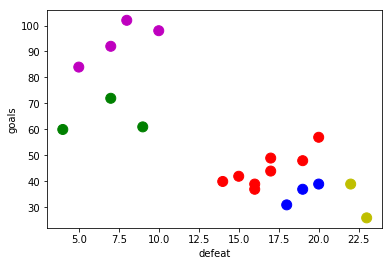

In [119]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='defeat', y='goals', c=colors, s=100)